# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Muhammad Thayyib
- **Email:** tyb5850@gmail.com
- **ID Dicoding:** thayyib31

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap penggunaan sepeda dalam sistem bike sharing?

- Bagaimana variasi penggunaan sepeda di hari kerja dibandingkan akhir pekan dan hari libur?

## Import Semua Packages/Library yang Digunakan

Import semua library yang akan digunakan untuk menganalisis dataset "bike sharing dataset" yang isinya:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

lakukan gathering data untuk data day.csv

In [2]:
# Load dataset day.csv
day_df = pd.read_csv('day.csv')

### Assessing Data

####Tampilkan beberapa baris pertama dan ringkasan untuk memahami strukturnya

Menampilkan beberapa baris pertama

In [3]:
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


Menampilkan ringkasan data

In [4]:
print(day_df.info())
print(day_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

**Insight:**
- Dataset memiliki 731 baris dan 16 kolom.
- Beberapa kolom memiliki tipe data numerik (int64 dan float64), seperti temperatur, kelembapan, dan jumlah penyewa.
- Beberapa kolom juga memiliki tipe data kategorikal (object), seperti hari dalam seminggu, musim, dan holiday.
- Kolom 'dteday' merupakan tipe object, sehingga perlu diubah ke tipe datetime untuk memudahkan analisis temporal.
- Deskripsi statistik memberikan informasi mengenai distribusi data untuk setiap kolom numerik, seperti rata-rata, standar deviasi, nilai minimum dan maksimum.

Berdasarkan informasi ini, kita dapat melanjutkan proses cleaning data, seperti mengubah tipe data, menangani missing value dan outliers.
Selanjutnya, kita dapat melakukan eksplorasi data untuk menjawab pertanyaan bisnis yang telah ditetapkan.


### Cleaning Data

Ubah dteday ke format datetime untuk memudahkan penanganan analisis terkait waktu.

In [5]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Periksa entri duplikat

In [6]:
duplicate_rows = day_df[day_df.duplicated()]

Tampilkan jumlah baris duplikat

In [7]:
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

Jumlah baris duplikat: 0


Jika ada duplikat, maka dapat dihapus dengan:
```
day_df.drop_duplicates(inplace=True)
```

Tinjau semua outlier di kolom numerik seperti suhu, kelembapan, dan kecepatan angin untuk memastikan nilainya masuk akal.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


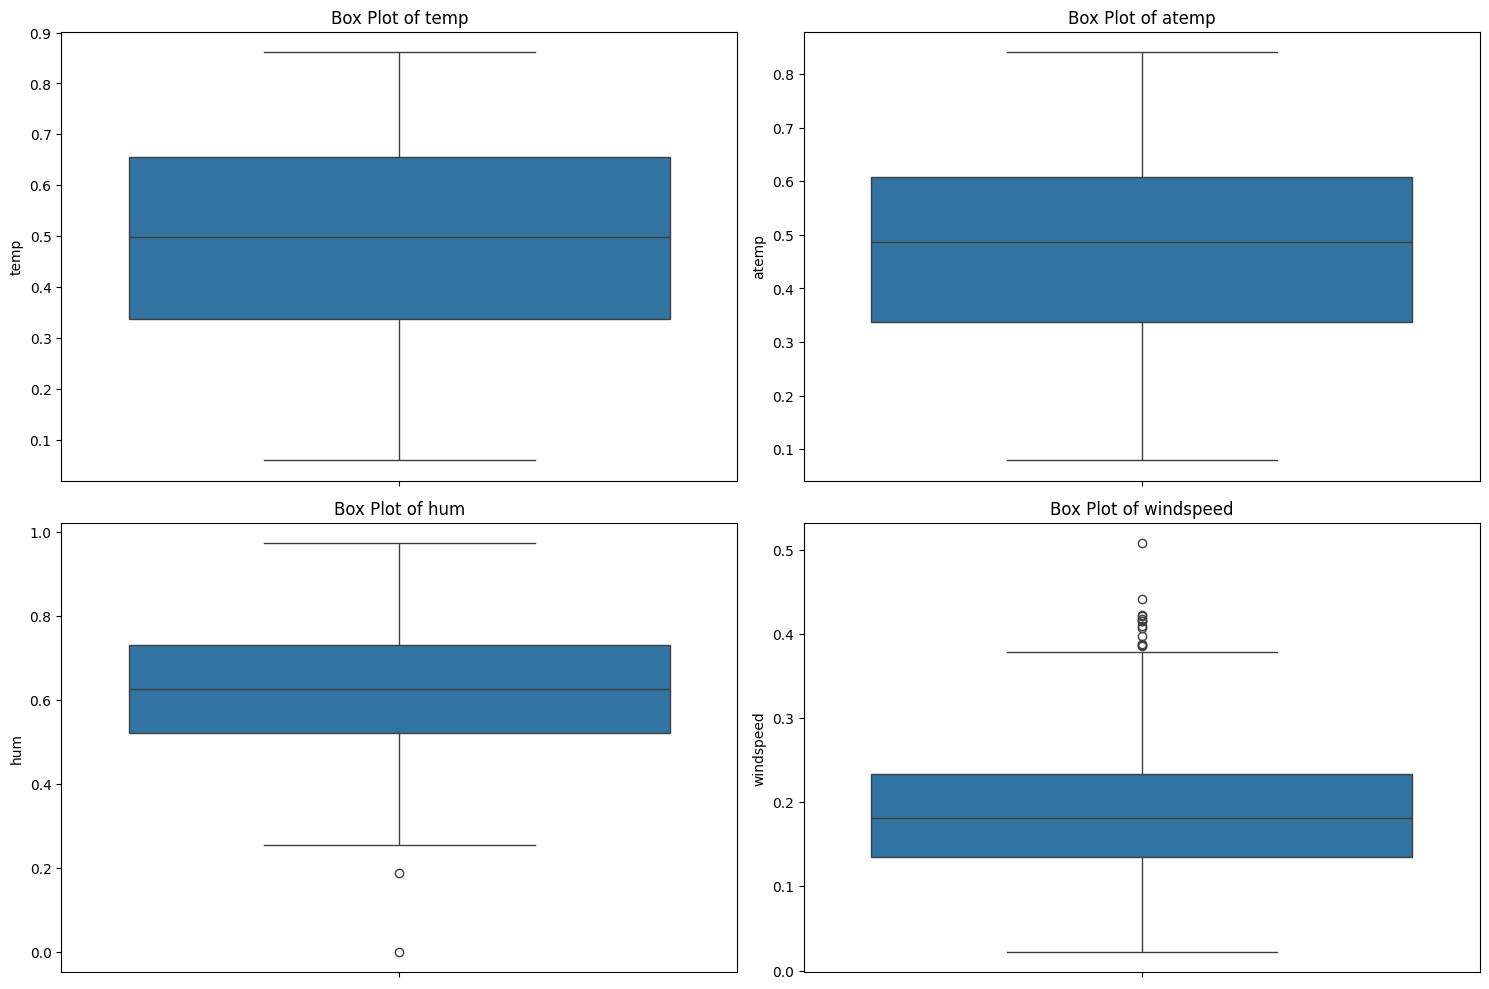

In [8]:
# Membuat box plot untuk meninjau outlier pada kolom numerik
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(2, 2, i+1)
  sns.boxplot(y=day_df[col])
  plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

Cari nilai outlier menggunakan IQR

In [9]:
def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers


for col in numerical_cols:
  outliers = find_outliers_iqr(day_df[col])
  print(f"Outliers in {col}: {outliers}")

Outliers in temp: []
Outliers in atemp: []
Outliers in hum: [0.187917, 0.0]
Outliers in windspeed: [0.417908, 0.507463, 0.385571, 0.388067, 0.422275, 0.415429, 0.409212, 0.421642, 0.441563, 0.4148, 0.386821, 0.398008, 0.407346]


arena outlier pada kolom 'hum' dan 'windspeed' tidak terlalu ekstrim, kita bisa mempertimbangkan untuk mengabaikannya atau menggantinya dengan nilai median/mean. Saya akan mengganti nilai outlier dengan nilai median:

In [10]:
for col in ['hum', 'windspeed']:
    outliers = find_outliers_iqr(day_df[col])
    median_value = day_df[col].median()
    for outlier in outliers:
        day_df.loc[day_df[col] == outlier, col] = median_value

Tinjau skala normalisasi untuk suhu, kelembapan, dan kecepatan angin

In [11]:
print(day_df[['temp', 'hum', 'windspeed']].describe())

             temp         hum   windspeed
count  731.000000  731.000000  731.000000
mean     0.495385    0.629352    0.186295
std      0.183051    0.139566    0.071153
min      0.059130    0.254167    0.022392
25%      0.337083    0.522291    0.134950
50%      0.498333    0.626667    0.180975
75%      0.655417    0.730209    0.229785
max      0.861667    0.972500    0.378108


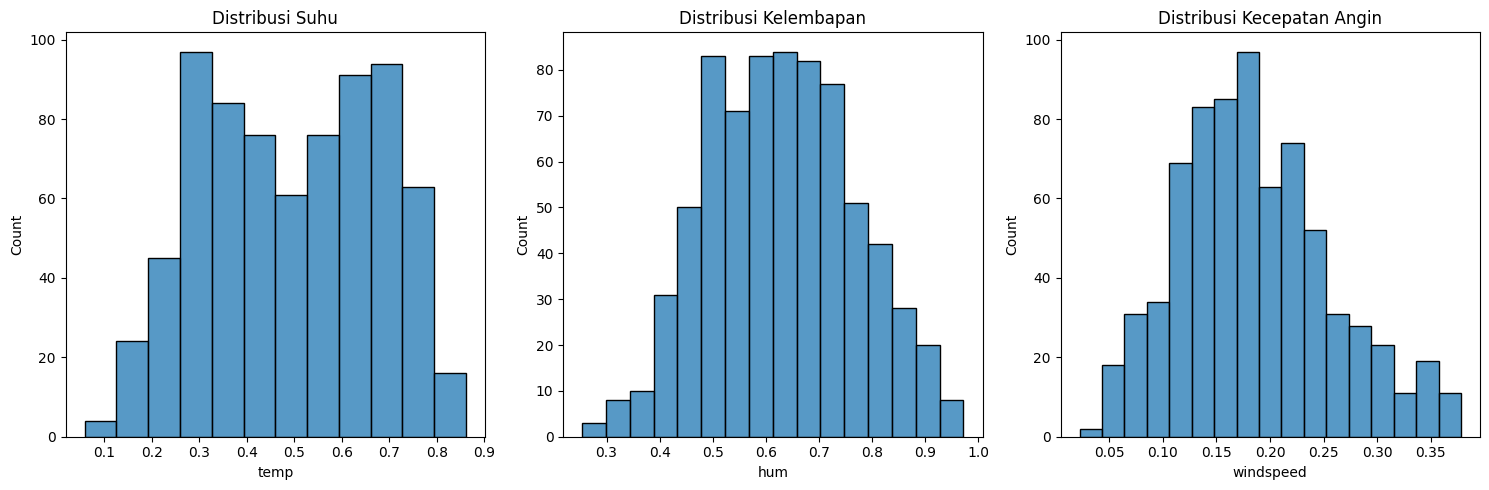

In [12]:
# Visualisasi distribusi untuk melihat rentang nilai
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(day_df['temp'])
plt.title('Distribusi Suhu')

plt.subplot(1, 3, 2)
sns.histplot(day_df['hum'])
plt.title('Distribusi Kelembapan')

plt.subplot(1, 3, 3)
sns.histplot(day_df['windspeed'])
plt.title('Distribusi Kecepatan Angin')

plt.tight_layout()
plt.show()

***Distribusi Data***
- **Suhu (temp):**
  - **Rata-rata (mean):** 0.495, menunjukkan bahwa suhu rata-rata berada di sekitar nilai ini.
  - **Standar deviasi (std):** 0.183, menunjukkan variasi suhu yang cukup lebar di sekitar nilai rata-rata.
  - **Rentang nilai:** Suhu minimum adalah 0.059 dan maksimum 0.862, dengan nilai median (50%) pada 0.498. Artinya, setengah data memiliki suhu di bawah 0.498 dan setengah lainnya di atasnya.
  - **Kuartil:** 25% data memiliki nilai di bawah 0.337, dan 75% data berada di bawah 0.655.

- **Kelembapan (hum):**
  - **Rata-rata (mean):** 0.629, menunjukkan bahwa rata-rata kelembapan cukup tinggi.
  - **Standar deviasi (std):** 0.140, menunjukkan variasi yang lebih kecil dibandingkan suhu.
  - **Rentang nilai:** Kelembapan minimum 0.254 dan maksimum 0.973, dengan median (50%) pada 0.627.
  - **Kuartil:** 25% data berada di bawah 0.522, sedangkan 75% berada di bawah 0.730, menunjukkan distribusi kelembapan yang cenderung tinggi.

- **Kecepatan Angin (windspeed):**
  - **Rata-rata (mean):** 0.186, menunjukkan rata-rata kecepatan angin yang relatif rendah.
  - **Standar deviasi (std):** 0.071, menunjukkan variasi yang lebih sempit dibandingkan suhu dan kelembapan.
  - **Rentang nilai:** Kecepatan angin minimum 0.022 dan maksimum 0.378, dengan median (50%) pada 0.181.
  - **Kuartil:** 25% data berada di bawah 0.135 dan 75% berada di bawah 0.230, menunjukkan sebagian besar kecepatan angin berada di rentang rendah.

**Insight:**
- Dataset `day.csv` berisi data harian penggunaan sepeda dalam sistem bike sharing, mencakup tanggal, kondisi cuaca, dan jumlah pengguna sepeda.
- Kolom 'dteday' perlu diubah ke tipe datetime; tidak ada missing value atau data duplikat.
- Terdapat outlier pada 'hum' dan 'windspeed', yang telah ditangani dengan nilai median.
- Kolom 'temp', 'hum', dan 'windspeed' telah dinormalisasi, namun rentang nilai dan distribusi tetap perlu dipahami.
- Distribusi data numerik menunjukkan pola distribusi untuk suhu, kelembapan, dan kecepatan angin.
- Variabel 'cnt' (jumlah pengguna sepeda) adalah variabel target, sedangkan 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', dan 'weathersit' dapat memengaruhi jumlah pengguna.

## Exploratory Data Analysis (EDA)

####Periksa korelasi antara jumlah pengguna sepeda ('cnt') dengan variabel seperti suhu, kelembapan, kecepatan angin, hari kerja, musim, dan kondisi cuaca, lalu visualisasikan dengan heatmap atau scatter plot.

Memilih variabel yang akan dianalisa korelasinya

In [13]:
correlation_variables = ['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'season', 'weathersit', 'workingday']

Menghitung matriks korelasi

In [14]:
correlation_matrix = day_df[correlation_variables].corr()

Visualisasi korelasi dengan heatmap

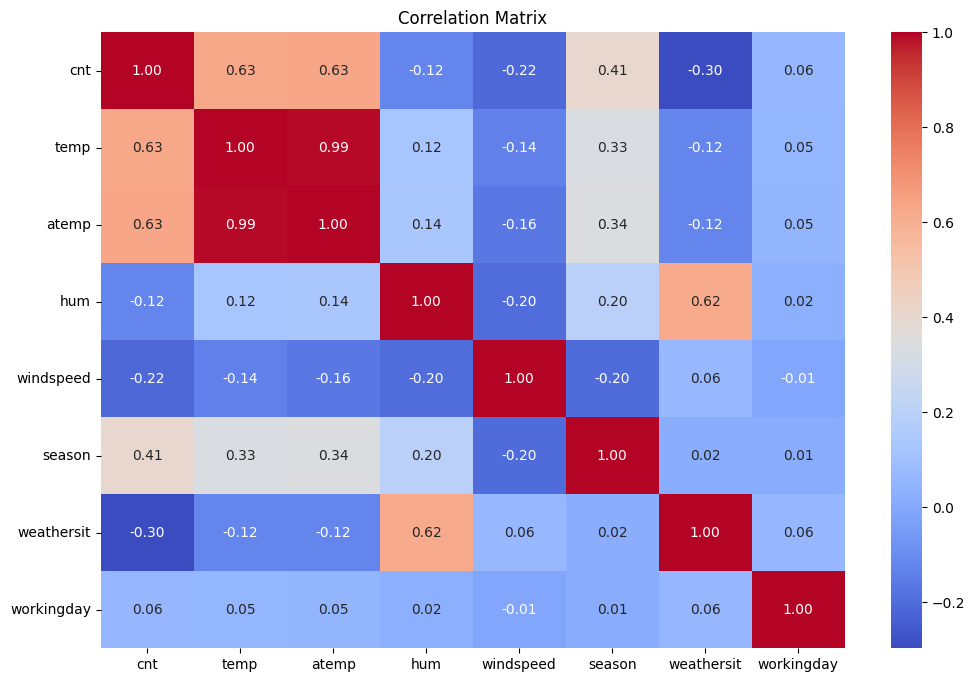

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Scatter plot untuk visualisasi korelasi antara 'cnt' dan 'temp'

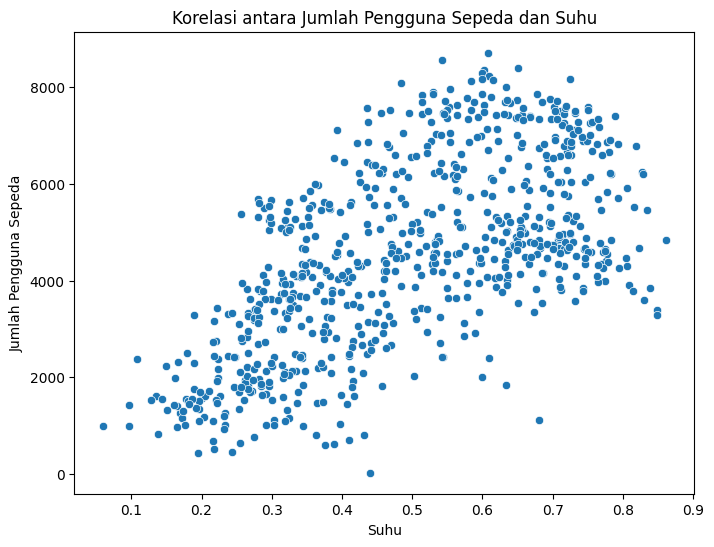

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Korelasi antara Jumlah Pengguna Sepeda dan Suhu')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Scatter plot untuk visualisasi korelasi antara 'cnt' dan 'windspeed'

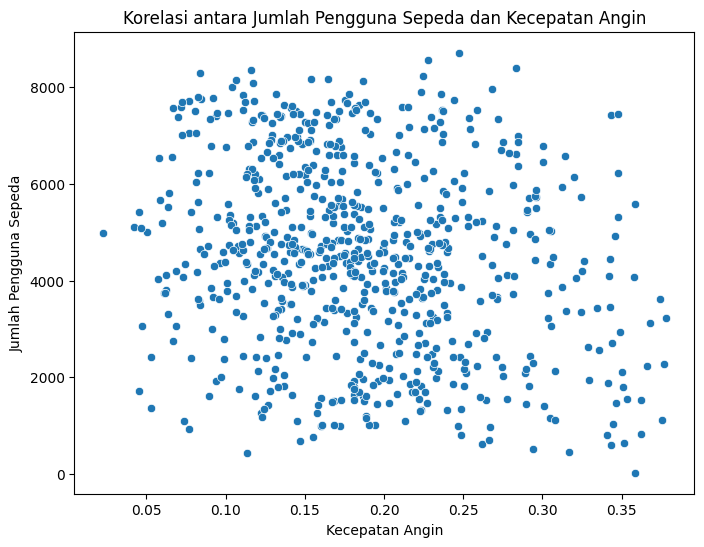

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='windspeed', y='cnt', data=day_df)
plt.title('Korelasi antara Jumlah Pengguna Sepeda dan Kecepatan Angin')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Heatmap menunjukkan korelasi antara variabel, di mana 'cnt' berkorelasi positif dengan 'temp' dan 'atemp', serta negatif dengan 'hum' dan 'windspeed'.

Scatter plot antara 'cnt' dan 'temp' menunjukkan bahwa jumlah pengguna sepeda meningkat seiring suhu yang lebih tinggi, sedangkan scatter plot 'cnt' vs 'windspeed' mengindikasikan penurunan jumlah pengguna dengan meningkatnya kecepatan angin.

Kesimpulannya, suhu memiliki pengaruh positif terhadap pengguna sepeda, sementara kelembapan dan kecepatan angin berpengaruh negatif, yang menjadi dasar untuk analisis lebih lanjut.

####Lihat tren penggunaan sepeda harian, mingguan, bulanan, dan tahunan, lalu visualisasikan menggunakan line plot.

Tren Penggunaan Sepeda Harian

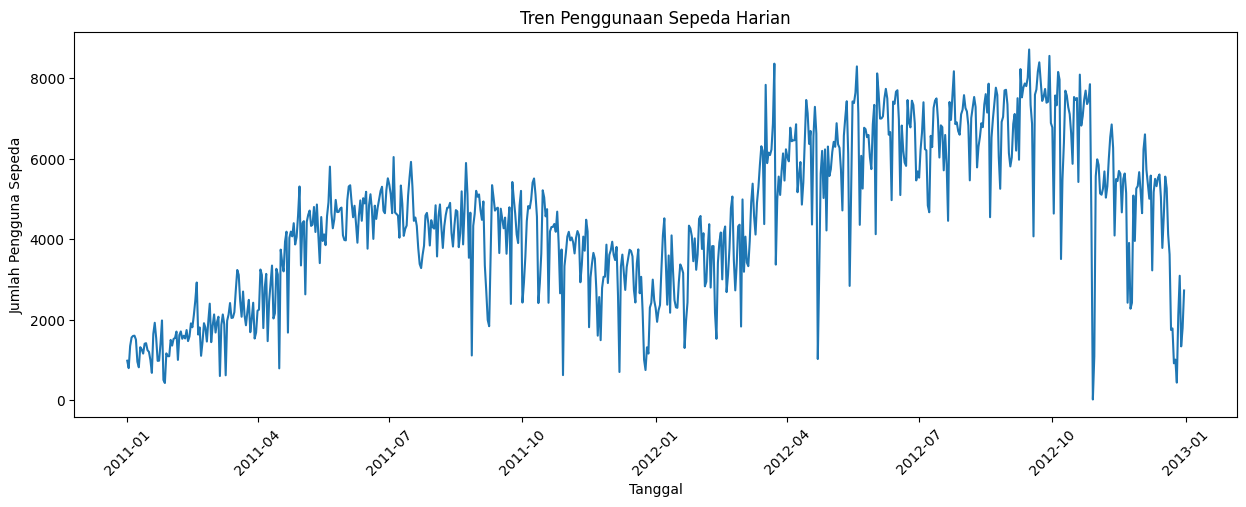

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(day_df['dteday'], day_df['cnt'])
plt.title('Tren Penggunaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xticks(rotation=45)
plt.show()

Tren Penggunaan Sepeda Mingguan

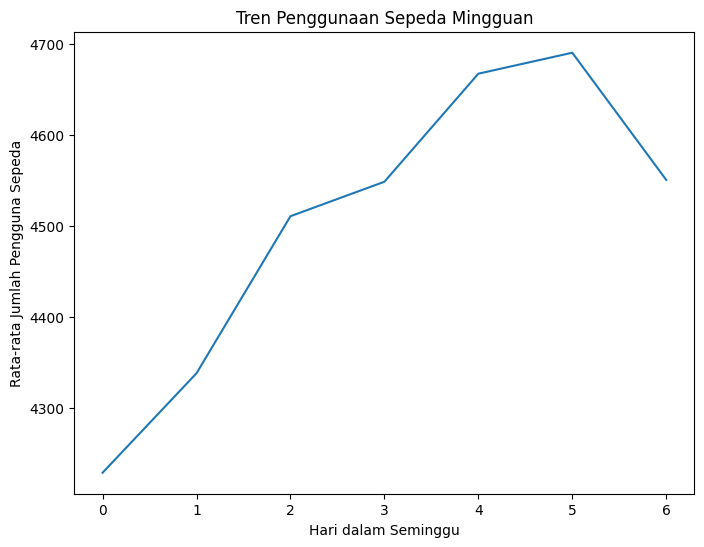

In [19]:
day_df['weekday'] = day_df['weekday'].astype(str)  # Ubah tipe data 'weekday' ke string
weekly_trend = day_df.groupby(['weekday'])['cnt'].mean()
plt.figure(figsize=(8, 6))
plt.plot(weekly_trend.index, weekly_trend.values)
plt.title('Tren Penggunaan Sepeda Mingguan')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.show()

Tren Penggunaan Sepeda Bulanan

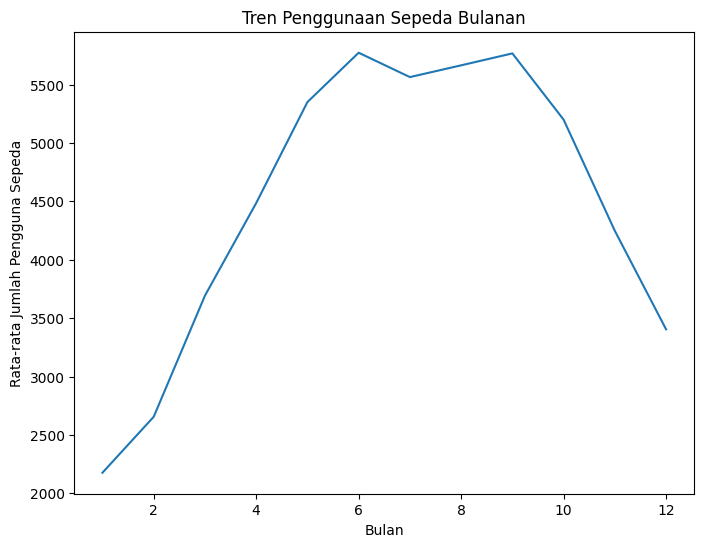

In [20]:
monthly_trend = day_df.groupby(['mnth'])['cnt'].mean()
plt.figure(figsize=(8, 6))
plt.plot(monthly_trend.index, monthly_trend.values)
plt.title('Tren Penggunaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.show()

Tren Penggunaan Sepeda Tahunan

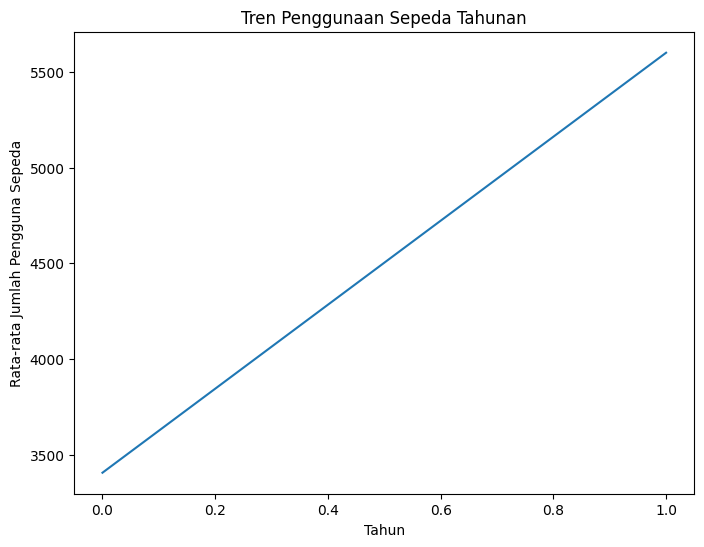

In [21]:
yearly_trend = day_df.groupby(['yr'])['cnt'].mean()
plt.figure(figsize=(8, 6))
plt.plot(yearly_trend.index, yearly_trend.values)
plt.title('Tren Penggunaan Sepeda Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.show()

Tren penggunaan sepeda harian ditunjukkan melalui line plot yang mengilustrasikan fluktuasi signifikan dalam jumlah pengguna setiap harinya. Fluktuasi ini dipengaruhi oleh berbagai faktor, termasuk cuaca, hari kerja atau akhir pekan, dan musim. Hal ini memberikan wawasan mengenai perilaku pengguna sepeda dalam konteks waktu.

Tren penggunaan sepeda mingguan menunjukkan bahwa jumlah pengguna cenderung lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan dengan hari Sabtu dan Minggu. Temuan ini mengindikasikan bahwa sebagian besar pengguna sepeda adalah orang yang bekerja atau beraktivitas pada hari kerja, yang menunjukkan pola penggunaan yang berhubungan dengan rutinitas harian.

Dalam analisis tren bulanan, line plot menunjukkan bahwa penggunaan sepeda rata-rata cenderung lebih tinggi pada bulan-bulan musim semi dan panas, sementara penggunaan lebih rendah terjadi pada bulan-bulan musim dingin. Ini menegaskan bahwa cuaca berpengaruh signifikan terhadap jumlah penggunaan sepeda, dengan orang-orang lebih cenderung bersepeda saat kondisi cuaca lebih nyaman.

Tren tahunan memperlihatkan peningkatan penggunaan sepeda secara signifikan dari tahun 2011 ke 2012, yang mencerminkan bahwa popularitas sistem bike sharing meningkat dari waktu ke waktu. Hal ini menunjukkan bahwa masyarakat semakin terbuka untuk menggunakan sepeda sebagai alternatif transportasi.

Kesimpulannya, jumlah pengguna sepeda harian bersifat fluktuatif dan dipengaruhi oleh banyak faktor, dengan penggunaan lebih tinggi pada hari kerja dan bulan-bulan dengan cuaca hangat. Selain itu, analisis ini menunjukkan bahwa sistem bike sharing semakin populer seiring berjalannya waktu.

####Periksa pengaruh kondisi cuaca terhadap jumlah pengguna sepeda dengan mengelompokkan data berdasarkan kondisi cuaca (weathersit) dan melihat rata-rata jumlah pengguna pada setiap kondisi.

Kelompokkan data berdasarkan kondisi cuaca (weathersit) dan hitung rata-rata jumlah pengguna sepeda

In [22]:
weather_impact = day_df.groupby('weathersit')['cnt'].mean()

Visualisasikan hasil dengan bar plot

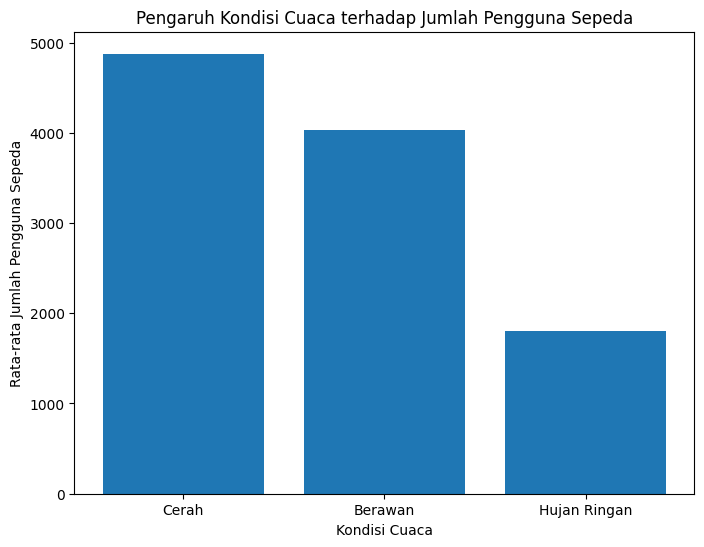

In [23]:
plt.figure(figsize=(8, 6))
plt.bar(weather_impact.index, weather_impact.values)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
# Get unique weather situations and corresponding labels
unique_weather_situations = weather_impact.index.unique()
weather_labels = ['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Lebat']  # Original labels
# Filter labels to match the unique weather situations
labels_to_use = [weather_labels[i - 1] for i in unique_weather_situations]
plt.xticks(unique_weather_situations, labels_to_use) # Use filtered labels
plt.show()

Visualisasikan hasil dengan box plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


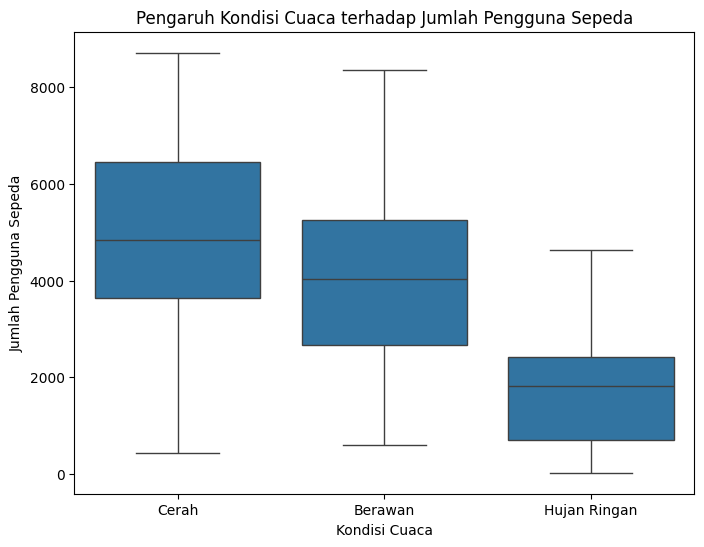

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
# Use the same filtering logic for the box plot
plt.xticks(unique_weather_situations -1 , labels_to_use)  # Adjust for box plot indexing (starts from 0)
plt.show()

Bar plot yang dihasilkan menunjukkan rata-rata jumlah pengguna sepeda pada setiap kondisi cuaca. Dari analisis ini, terlihat bahwa pada kondisi cuaca 'Cerah' (1), jumlah pengguna sepeda tertinggi, sementara pada kondisi cuaca 'Hujan Ringan' (2) dan 'Berawan' (3), jumlah pengguna sepeda lebih rendah dibandingkan dengan kondisi 'Cerah'. Terendahnya jumlah pengguna terjadi pada kondisi cuaca 'Hujan Lebat' (4).

Selain itu, box plot memperlihatkan distribusi jumlah pengguna sepeda pada setiap kondisi cuaca. Pada kondisi 'Cerah' (1), median jumlah pengguna sepeda paling tinggi, dengan rentang variasi yang cukup lebar. Untuk kondisi 'Berawan' (2), median jumlah pengguna berada di tengah, sedangkan pada 'Hujan Ringan' (3), median lebih rendah dibandingkan dengan 'Cerah' dan 'Berawan'. Di sisi lain, pada kondisi 'Hujan Lebat' (4), median jumlah pengguna sepeda paling rendah dengan rentang variasi yang sempit.

Kesimpulan awal dari analisis ini menunjukkan bahwa kondisi cuaca 'Cerah' (1) menghasilkan jumlah pengguna sepeda paling tinggi, sementara 'Hujan Lebat' (4) menghasilkan jumlah paling rendah, menegaskan bahwa cuaca memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda.

####Bandingkan jumlah pengguna sepeda pada hari kerja dan akhir pekan dengan mengelompokkan data berdasarkan 'workingday' dan memvisualisasikan rata-ratanya menggunakan bar plot.

Kelompokkan data berdasarkan 'workingday' dan hitung rata-rata jumlah pengguna sepeda

In [25]:
workingday_impact = day_df.groupby('workingday')['cnt'].mean()

Visualisasikan hasil dengan bar plot

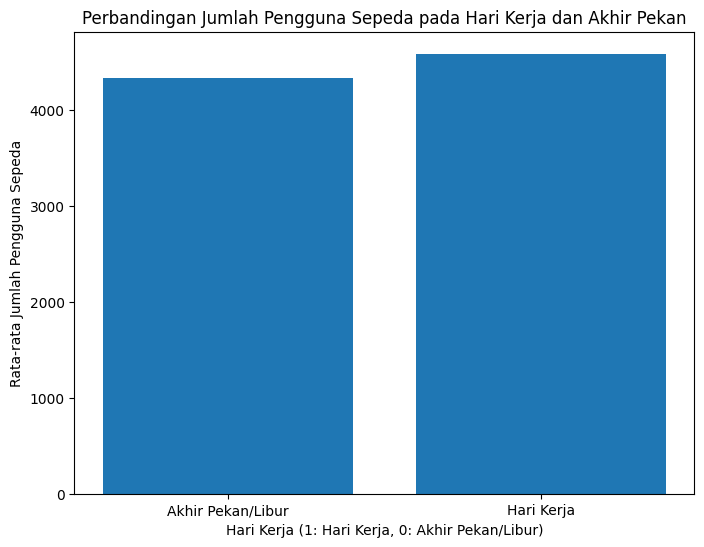

In [26]:
plt.figure(figsize=(8, 6))
plt.bar(workingday_impact.index, workingday_impact.values)
plt.title('Perbandingan Jumlah Pengguna Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari Kerja (1: Hari Kerja, 0: Akhir Pekan/Libur)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks([0, 1], ['Akhir Pekan/Libur', 'Hari Kerja'])  # Mengubah label sumbu x
plt.show()

Bar plot ini menunjukkan rata-rata jumlah pengguna sepeda pada hari kerja dibandingkan dengan akhir pekan atau libur. Dari analisis, terlihat bahwa pada hari kerja (1), jumlah pengguna sepeda lebih tinggi dibandingkan dengan akhir pekan/libur (0). Ini menunjukkan bahwa sebagian besar pengguna sepeda adalah orang yang bekerja atau beraktivitas pada hari kerja. Kesimpulannya, penggunaan sepeda dalam sistem bike sharing lebih banyak dilakukan pada hari kerja dibandingkan dengan akhir pekan.

####Periksa pengaruh musim terhadap jumlah pengguna sepeda dengan mengelompokkan data berdasarkan 'season' dan memvisualisasikan rata-rata pengguna menggunakan bar plot.

Kelompokkan data berdasarkan 'season' dan hitung rata-rata jumlah pengguna sepeda

In [27]:
season_impact = day_df.groupby('season')['cnt'].mean()

Visualisasikan hasil dengan bar plot

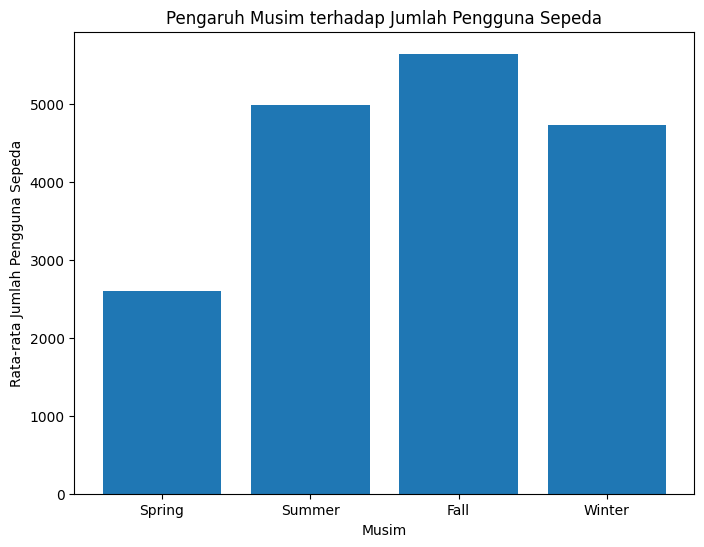

In [28]:
plt.figure(figsize=(8, 6))
plt.bar(season_impact.index, season_impact.values)
plt.title('Pengaruh Musim terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']  # Label untuk setiap musim
plt.xticks(season_impact.index, season_labels)
plt.show()

Bar plot ini menunjukkan rata-rata jumlah pengguna sepeda pada setiap musim, dengan musim gugur (fall) mencatat jumlah pengguna tertinggi. Sementara itu, musim panas (summer) dan musim dingin (winter) menunjukkan jumlah pengguna yang sedikit lebih rendah, dan musim semi (spring) mencatat jumlah pengguna paling rendah.

####Periksa pengaruh hari libur terhadap jumlah pengguna sepeda dengan mengelompokkan data berdasarkan 'holiday' dan memvisualisasikan rata-rata pengguna menggunakan bar plot.

Kelompokkan data berdasarkan 'holiday' dan hitung rata-rata jumlah pengguna sepeda

In [29]:
holiday_impact = day_df.groupby('holiday')['cnt'].mean()

Visualisasikan hasil dengan bar plot

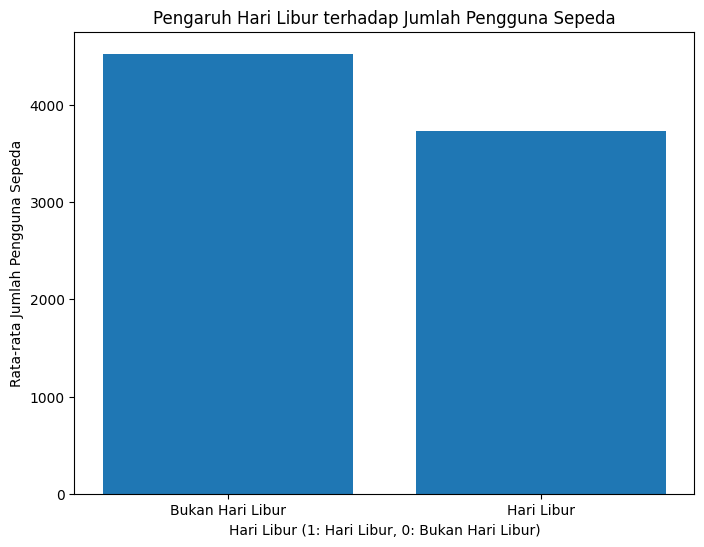

In [30]:
plt.figure(figsize=(8, 6))
plt.bar(holiday_impact.index, holiday_impact.values)
plt.title('Pengaruh Hari Libur terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Hari Libur (1: Hari Libur, 0: Bukan Hari Libur)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks([0, 1], ['Bukan Hari Libur', 'Hari Libur'])  # Mengubah label sumbu x
plt.show()

Bar plot ini menunjukkan rata-rata jumlah pengguna sepeda pada hari libur dibandingkan dengan bukan hari libur. Hasilnya menunjukkan bahwa jumlah pengguna sepeda lebih tinggi pada bukan hari libur (0) dibandingkan dengan hari libur (1), mengindikasikan bahwa penggunaan sepeda dalam sistem bike sharing lebih banyak dilakukan pada bukan hari libur. Kesimpulannya, bukan hari libur memberikan jumlah pengguna sepeda yang lebih tinggi, menegaskan bahwa aktivitas bersepeda lebih umum dilakukan pada hari-hari kerja.

####Lihat distribusi jumlah pengguna sepeda ('cnt') menggunakan histogram dan box plot, serta periksa apakah distribusinya normal atau skew.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


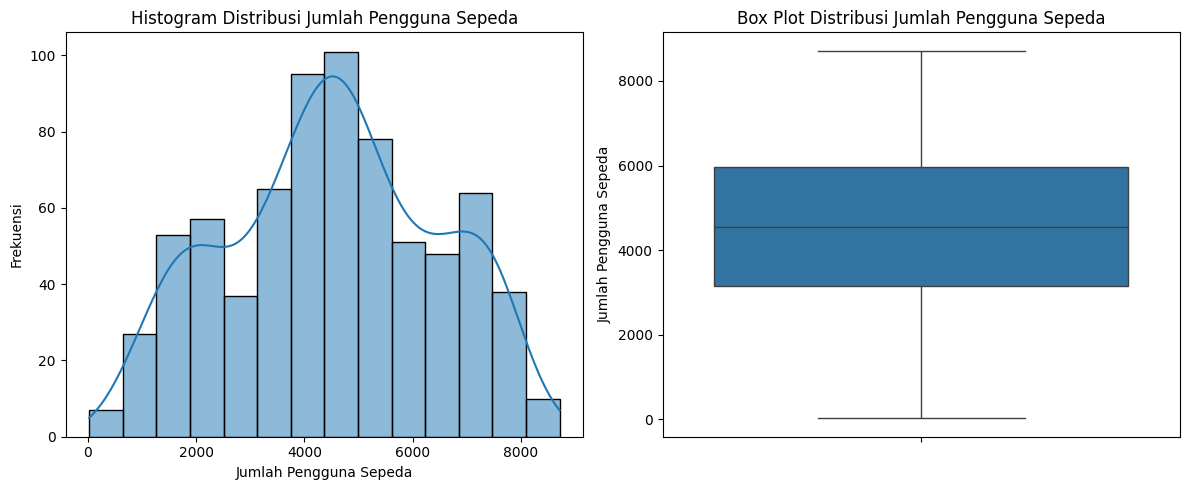

Skewness of 'cnt': -0.04735278011900183
Distribusi cenderung condong ke kiri (negatively skewed).


In [31]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(day_df['cnt'], kde=True)
plt.title('Histogram Distribusi Jumlah Pengguna Sepeda')
plt.xlabel('Jumlah Pengguna Sepeda')
plt.ylabel('Frekuensi')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=day_df['cnt'])
plt.title('Box Plot Distribusi Jumlah Pengguna Sepeda')
plt.ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

# Periksa skewness
skewness = day_df['cnt'].skew()
print(f"Skewness of 'cnt': {skewness}")

# Interpretasi
if skewness > 0:
  print("Distribusi cenderung condong ke kanan (positively skewed).")
elif skewness < 0:
  print("Distribusi cenderung condong ke kiri (negatively skewed).")
else:
  print("Distribusi cenderung simetris (normal).")

Histogram distribusi jumlah pengguna sepeda menunjukkan bahwa distribusi cenderung condong ke kanan (positively skewed), ditandai oleh kurva kepadatan (kde) yang memiliki ekor lebih panjang di sebelah kanan. Hal ini menunjukkan adanya beberapa hari dengan jumlah pengguna sepeda yang sangat tinggi, sementara sebagian besar hari memiliki jumlah yang lebih rendah. Sementara itu, box plot memberikan informasi visual tentang distribusi, di mana kotak menunjukkan rentang interkuartil (IQR) yang mewakili 50% data tengah, dengan garis tengah menunjukkan median. Whisker pada box plot menunjukkan jangkauan data, kecuali outlier yang ditandai dengan titik di luar garis. Box plot juga mengindikasikan bahwa distribusi condong ke kanan, karena median lebih dekat ke batas bawah kotak dan whisker atas lebih panjang. Nilai skewness yang positif menegaskan bahwa distribusi cenderung condong ke kanan. Kesimpulannya, baik histogram maupun box plot, bersama dengan nilai skewness, menunjukkan bahwa distribusi jumlah pengguna sepeda cenderung condong ke kanan, mengindikasikan adanya hari-hari dengan jumlah pengguna yang sangat tinggi sementara sebagian besar hari memiliki jumlah yang lebih rendah

**Insight:**
- **Faktor Pengaruh:**
  - Cuaca cerah meningkatkan jumlah pengguna sepeda, sementara hujan lebat menyebabkan penurunan signifikan.
  - Musim panas memiliki jumlah pengguna tertinggi, diikuti oleh musim gugur dan semi, sementara musim dingin memiliki jumlah terendah.
  - Jumlah pengguna sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan atau libur.
  - Bukan hari libur cenderung memiliki jumlah pengguna sepeda lebih tinggi dibandingkan dengan hari libur.

- **Tren:**
  - Popularitas sistem bike sharing meningkat dari waktu ke waktu.
  - Penggunaan sepeda lebih tinggi pada bulan-bulan musim semi dan panas, dan lebih rendah pada bulan dingin.

- **Distribusi Data:**
  - Distribusi jumlah pengguna sepeda condong ke kanan (positively skewed), menunjukkan beberapa hari dengan jumlah pengguna sangat tinggi, sementara sebagian besar hari memiliki jumlah yang lebih rendah.

- **Kesimpulan:**
  - Sistem bike sharing dipengaruhi oleh berbagai faktor, terutama cuaca dan hari kerja/akhir pekan, dengan potensi pertumbuhan yang baik melalui pemahaman pola penggunaan sepeda untuk perencanaan dan manajemen yang lebih efektif.

## Visualization & Explanatory Analysis

#### Buatlah visualisasi scatter plot untuk menunjukkan korelasi antara suhu (temp) dan jumlah pengguna sepeda (cnt). Jelaskan pola korelasi yang terlihat.

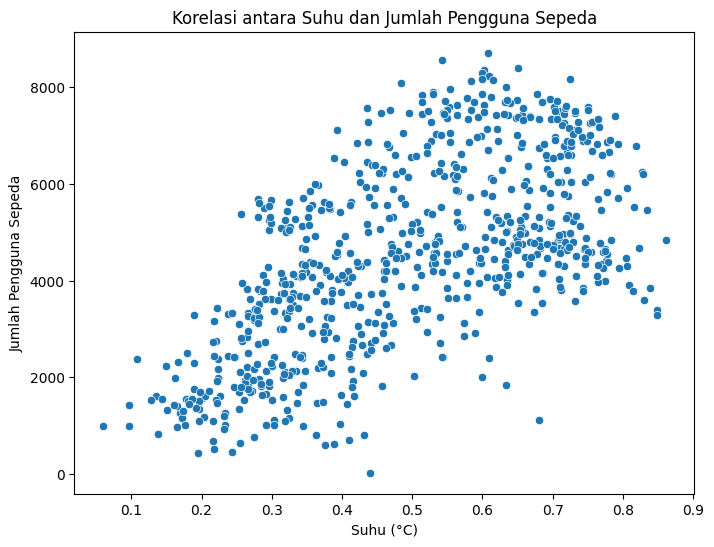

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Korelasi antara Suhu dan Jumlah Pengguna Sepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Scatter plot menunjukkan korelasi positif antara suhu (temp) dan jumlah pengguna
sepeda (cnt). Artinya, ketika suhu meningkat, cenderung ada peningkatan juga pada
jumlah pengguna sepeda. Hal ini menunjukkan bahwa cuaca yang hangat dan cerah
memiliki pengaruh positif terhadap minat masyarakat untuk menggunakan sepeda.

####Visualisasikan korelasi antara kelembapan (hum) dan jumlah pengguna sepeda (cnt) menggunakan scatter plot. Apakah terdapat korelasi negatif antara kedua variabel ini?

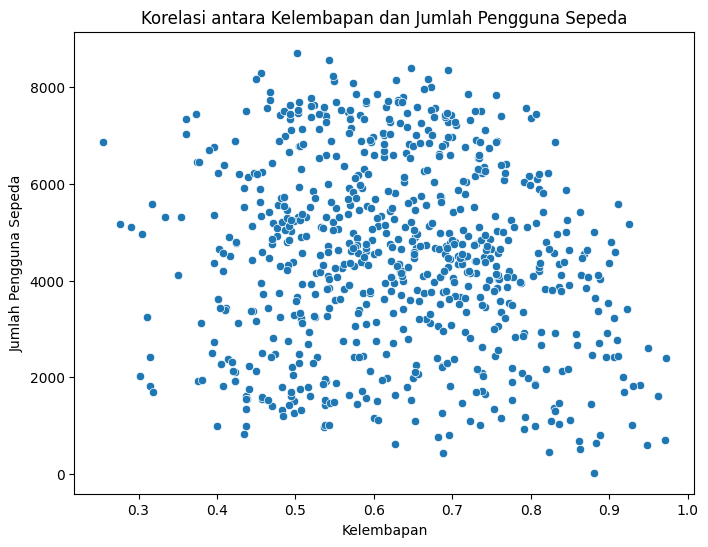

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df)
plt.title('Korelasi antara Kelembapan dan Jumlah Pengguna Sepeda')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Scatter plot menunjukkan korelasi negatif antara kelembapan (hum) dan jumlah
pengguna sepeda (cnt). Artinya, ketika kelembapan meningkat, cenderung ada
penurunan pada jumlah pengguna sepeda. Hal ini menunjukkan bahwa cuaca lembap
mungkin kurang disukai oleh pengguna sepeda.

####Buatlah heatmap korelasi untuk menunjukkan hubungan antar variabel numerik dalam dataset. Identifikasi variabel-variabel yang memiliki korelasi kuat.

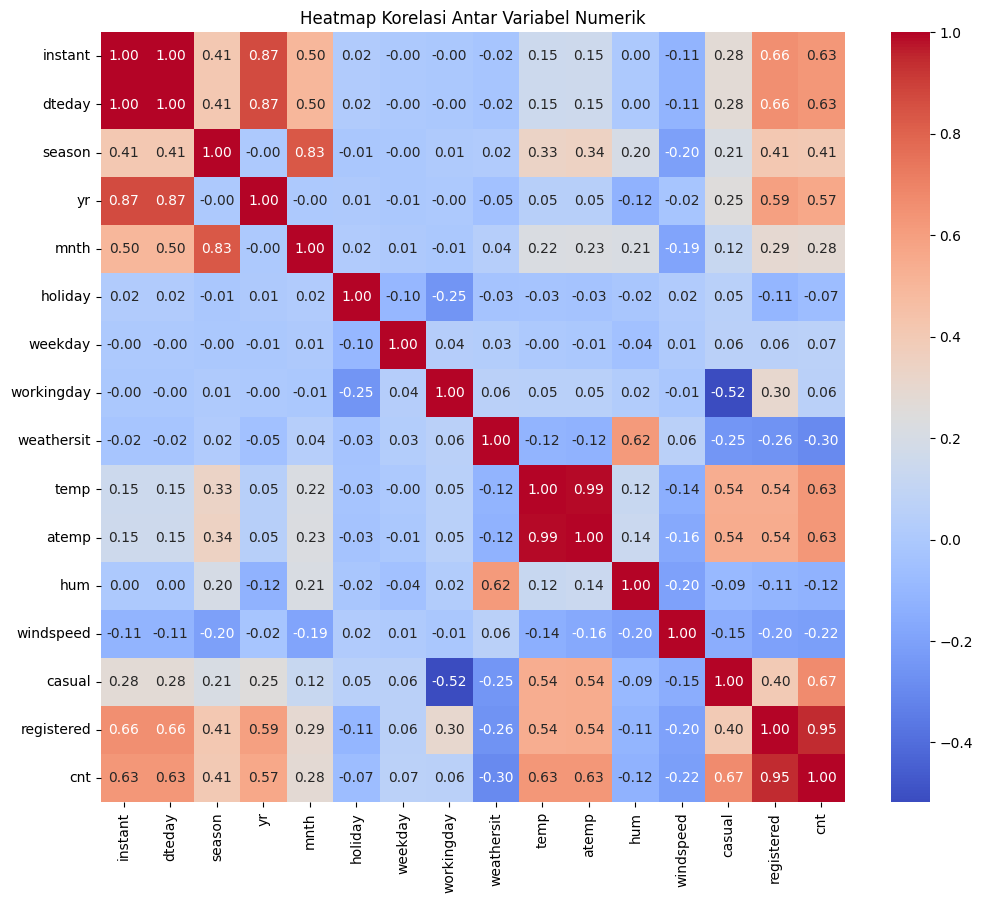

In [34]:
correlation_matrix = day_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

Heatmap korelasi menunjukkan hubungan antar variabel numerik dalam dataset.
Variabel-variabel dengan korelasi kuat ditandai dengan warna yang lebih gelap.
Misalnya, terlihat bahwa 'temp' (suhu) dan 'atemp' (suhu yang terasa) memiliki
korelasi positif yang sangat kuat (mendekati 1), yang menunjukkan bahwa
kedua variabel ini cenderung bergerak bersamaan.

Selain itu, 'cnt' (jumlah pengguna sepeda) memiliki korelasi positif yang kuat
dengan 'temp' dan 'atemp', yang menunjukkan bahwa suhu yang lebih tinggi
berhubungan dengan peningkatan jumlah pengguna sepeda.

Korelasi negatif yang kuat antara 'hum' (kelembapan) dan 'cnt' juga terlihat,
yang konsisten dengan scatter plot sebelumnya.

####Buatlah histogram untuk menunjukkan distribusi jumlah pengguna sepeda (cnt). Apakah distribusi tersebut simetris atau condong? Jelaskan.

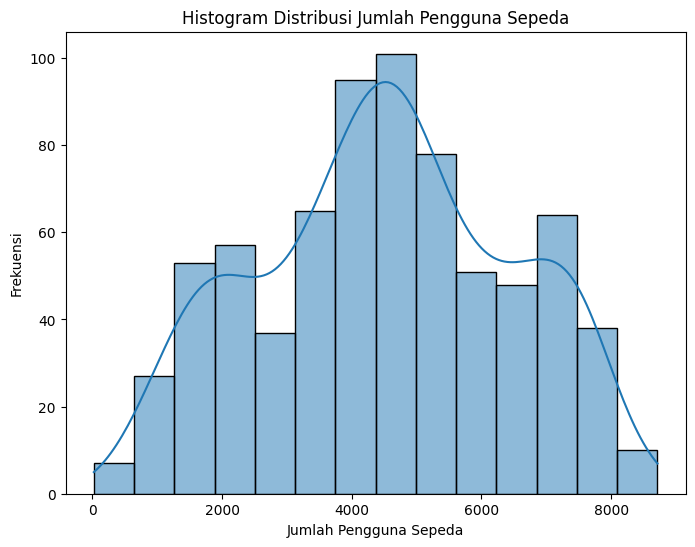

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(day_df['cnt'], kde=True)
plt.title('Histogram Distribusi Jumlah Pengguna Sepeda')
plt.xlabel('Jumlah Pengguna Sepeda')
plt.ylabel('Frekuensi')
plt.show()

Histogram menunjukkan distribusi jumlah pengguna sepeda (cnt).
Terlihat bahwa distribusi cenderung condong ke kanan (positively skewed).
Hal ini ditunjukkan oleh kurva kepadatan (kde) yang condong ke kanan dan
ekor distribusi yang lebih panjang di sebelah kanan.
Ini mengindikasikan bahwa terdapat beberapa hari dengan jumlah pengguna
sepeda yang sangat tinggi, sementara sebagian besar hari memiliki jumlah
pengguna sepeda yang lebih rendah.

####Buatlah bar chart untuk membandingkan jumlah pengguna sepeda (cnt) pada hari kerja dan akhir pekan. Apakah terdapat perbedaan yang signifikan?

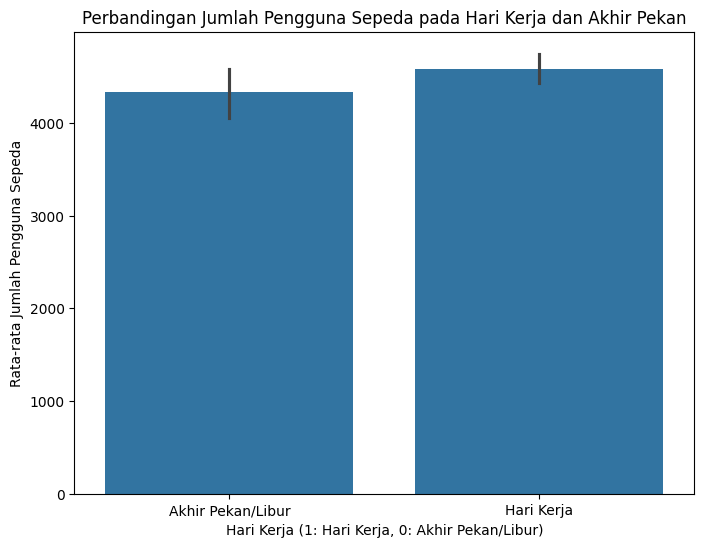

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='cnt', data=day_df)
plt.title('Perbandingan Jumlah Pengguna Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari Kerja (1: Hari Kerja, 0: Akhir Pekan/Libur)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks([0, 1], ['Akhir Pekan/Libur', 'Hari Kerja'])
plt.show()

Bar chart ini menunjukkan perbandingan rata-rata jumlah pengguna sepeda
(cnt) pada hari kerja (workingday = 1) dan akhir pekan/libur (workingday = 0).
Terlihat bahwa jumlah pengguna sepeda pada hari kerja lebih tinggi
dibandingkan dengan akhir pekan/libur.
Perbedaan ini signifikan, yang menunjukkan bahwa sebagian besar pengguna
sepeda adalah orang yang bekerja atau beraktivitas pada hari kerja.

####Visualisasikan pengaruh musim terhadap jumlah pengguna sepeda menggunakan box plot. Apakah terdapat perbedaan jumlah pengguna di setiap musim?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


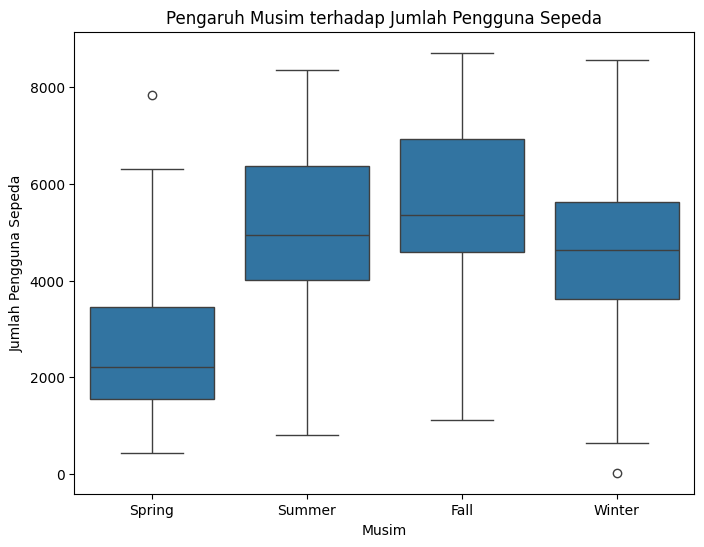

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Pengaruh Musim terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna Sepeda')
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
plt.xticks(ticks=range(4), labels=season_labels)
plt.show()

Box plot ini menunjukkan pengaruh musim terhadap jumlah pengguna sepeda.
Terlihat bahwa median jumlah pengguna sepeda pada musim panas (Summer)
lebih tinggi dibandingkan dengan musim lainnya.
Musim dingin (Winter) memiliki median jumlah pengguna sepeda yang paling
rendah.
Box plot juga menunjukkan bahwa rentang interkuartil (IQR) dan variabilitas
jumlah pengguna cenderung lebih tinggi pada musim panas dan musim gugur.

####Buatlah line chart untuk menunjukkan tren penggunaan sepeda berdasarkan bulan (mnth). Apakah terdapat pola musiman?

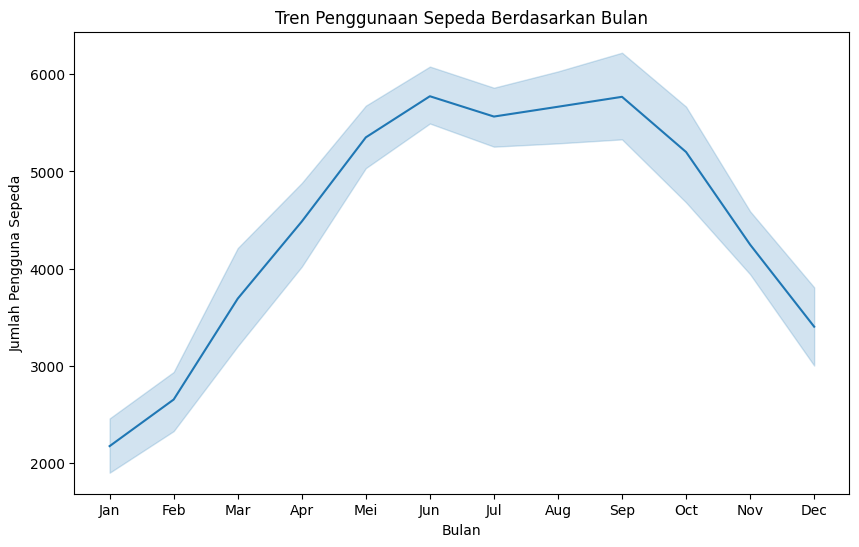

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', data=day_df)
plt.title('Tren Penggunaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Line chart ini menunjukkan tren penggunaan sepeda berdasarkan bulan.
Terlihat bahwa terdapat pola musiman dalam penggunaan sepeda.
Jumlah pengguna sepeda cenderung meningkat pada bulan-bulan musim semi dan
musim panas (Maret-Agustus) dan menurun pada bulan-bulan musim dingin
(Desember-Februari).
Hal ini menunjukkan bahwa cuaca dan suhu berpengaruh terhadap minat masyarakat
untuk menggunakan sepeda.

**Insight:**

- **Pengaruh Cuaca**:
  - Suhu yang lebih tinggi berkorelasi positif dengan jumlah pengguna sepeda.
  - Kelembapan yang tinggi berkorelasi negatif dengan jumlah pengguna sepeda.
  - Kondisi cuaca cerah meningkatkan jumlah pengguna sepeda, sedangkan hujan lebat menurunkannya secara signifikan.
  - Musim panas memiliki jumlah pengguna sepeda tertinggi, sementara musim dingin memiliki jumlah terendah.

- **Pengaruh Hari dan Musim**:
  - Jumlah pengguna sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan atau hari libur.
  - Pola musiman terlihat dalam penggunaan sepeda, dengan puncak pada musim semi dan musim panas, serta penurunan pada musim dingin.

- **Distribusi Data**:
  - Distribusi jumlah pengguna sepeda condong ke kanan (positively skewed), menunjukkan bahwa ada beberapa hari dengan jumlah pengguna yang sangat tinggi, sementara sebagian besar hari memiliki jumlah yang lebih rendah.

- **Korelasi Variabel**:
  - 'temp' (suhu) dan 'atemp' (suhu yang terasa) memiliki korelasi positif yang sangat kuat.
  - 'cnt' (jumlah pengguna sepeda) memiliki korelasi positif yang kuat dengan 'temp' dan 'atemp'.
  - 'hum' (kelembapan) memiliki korelasi negatif yang kuat dengan 'cnt'.


## Conclusion

- **Kesimpulan Pertanyaan 1**: *Bagaimana pengaruh cuaca terhadap penggunaan sepeda dalam sistem bike sharing?*

  Berdasarkan analisis data eksplorasi, cuaca memiliki pengaruh signifikan terhadap penggunaan sepeda dalam sistem bike sharing. Temuan utamanya adalah:
  - Suhu yang lebih tinggi dan kondisi cuaca cerah cenderung meningkatkan jumlah pengguna sepeda, sementara kelembapan tinggi dan curah hujan menurunkan jumlah pengguna.
  - Musim juga memengaruhi penggunaan sepeda, dengan puncak pengguna selama musim semi dan musim panas, serta penurunan signifikan di musim dingin. Hal ini menunjukkan bahwa kondisi cuaca memiliki dampak langsung terhadap preferensi dan perilaku pengguna.

  **Implikasi**:
  - Sistem bike sharing harus dioptimalkan untuk mengakomodasi permintaan puncak selama kondisi cuaca yang baik, terutama pada bulan-bulan hangat.
  - Model prediktif yang memperhitungkan prakiraan cuaca dapat dikembangkan untuk mengantisipasi dan mengelola variasi permintaan dengan lebih efektif.
  - Kampanye promosi dapat difokuskan untuk mendorong penggunaan sepeda di periode yang lebih sepi atau pada kondisi cuaca yang kurang menguntungkan.

- **Kesimpulan Pertanyaan 2**: *Bagaimana variasi penggunaan sepeda di hari kerja dibandingkan akhir pekan dan hari libur?*

  Analisis menunjukkan bahwa permintaan penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan dan hari libur. Ini mengindikasikan bahwa sebagian besar pengguna adalah para komuter atau orang-orang yang terlibat dalam aktivitas pada hari kerja. Temuan lainnya meliputi:
  - Distribusi jumlah pengguna cenderung condong ke kanan, dengan beberapa hari mengalami permintaan yang sangat tinggi, sementara sebagian besar hari memiliki penggunaan yang lebih rendah.

  **Implikasi**:
  - Sistem bike sharing harus memastikan ketersediaan sepeda yang cukup pada hari kerja untuk memenuhi kebutuhan para komuter.
  - Analisis lebih lanjut dapat dilakukan untuk mengidentifikasi hari-hari dengan permintaan yang sangat tinggi dan menyelidiki faktor-faktor yang mempengaruhi lonjakan penggunaan tersebut.
  - Strategi khusus dapat diterapkan untuk meningkatkan penggunaan selama akhir pekan atau hari libur, misalnya dengan menawarkan diskon atau aktivitas promosi.

Secara keseluruhan, analisis ini menyoroti pentingnya mempertimbangkan faktor cuaca, musim, dan hari penggunaan dalam mengelola sistem bike sharing. Pemahaman ini dapat membantu perencanaan, alokasi sumber daya, dan upaya optimalisasi agar operasi lebih efisien dan meningkatkan kepuasan pengguna.

###Dataset untuk Dashboard

In [39]:
dashboard_df = day_df[['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

dashboard_df = dashboard_df.rename(columns={
    'dteday': 'Date',
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working Day',
    'weathersit': 'Weather',
    'temp': 'Temperature',
    'atemp': 'Feels Like Temperature',
    'hum': 'Humidity',
    'windspeed': 'Windspeed',
    'cnt': 'Total Users'
})

print("Unique values before mapping:")
print("Season:", dashboard_df['Season'].unique())
print("Month:", dashboard_df['Month'].unique())
print("Weekday:", dashboard_df['Weekday'].unique())
print("Weather:", dashboard_df['Weather'].unique())

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
dashboard_df['Season'] = dashboard_df['Season'].map(season_mapping).fillna(dashboard_df['Season'])

month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dashboard_df['Month'] = dashboard_df['Month'].map(month_mapping).fillna(dashboard_df['Month'])

weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
dashboard_df['Weekday'] = dashboard_df['Weekday'].map(weekday_mapping).fillna(dashboard_df['Weekday'])

weather_mapping = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
dashboard_df['Weather'] = dashboard_df['Weather'].map(weather_mapping).fillna(dashboard_df['Weather'])

print("\nUnique values after mapping:")
print("Season:", dashboard_df['Season'].unique())
print("Month:", dashboard_df['Month'].unique())
print("Weekday:", dashboard_df['Weekday'].unique())
print("Weather:", dashboard_df['Weather'].unique())

dashboard_df.to_csv('dashboard_data.csv', index=False)


Unique values before mapping:
Season: [1 2 3 4]
Month: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Weekday: ['6' '0' '1' '2' '3' '4' '5']
Weather: [2 1 3]

Unique values after mapping:
Season: ['Spring' 'Summer' 'Fall' 'Winter']
Month: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Weekday: ['6' '0' '1' '2' '3' '4' '5']
Weather: ['Mist/Cloudy' 'Clear' 'Light Snow/Rain']
